In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('tweets.csv',encoding= 'ISO-8859-1')
data

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,14936,14936,RT @saxenavishakha: Ghost of demonetization re...,False,0,NaN,2017-04-11 14:26:38,False,NaN,8.518037e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",MuzzammilAap,4,True,False
14936,14937,14937,N d modi fans-d true nationalists of the count...,False,0,NaN,2017-04-11 14:19:51,True,NaN,8.518020e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",JusteyAlex,0,False,False
14937,14938,14938,RT @bharat_builder: Lol. Demonetization has fi...,False,0,NaN,2017-04-11 14:19:14,False,NaN,8.518018e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",pavan_sethi,30,True,False
14938,14939,14939,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,False,0,NaN,2017-04-11 14:13:14,False,NaN,8.518003e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Stupidosaur,2,True,False


# Generating word frequancy

In [3]:
def gen_freq(text):
    word_list=[]
    
    for tw_words in  text.split():
        word_list.extend(tw_words)
        
    word_freq = pd.Series(word_list).value_counts()
    
    word_freq[:20]
    
    return word_freq
gen_freq(data.text.str)    

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
inflicting                     1
Syria,                         1
Breaking:                      1
https://t.co/9spYCkqy2O        1
:-p                            1
Length: 19601, dtype: int64

# EDA using word clouds

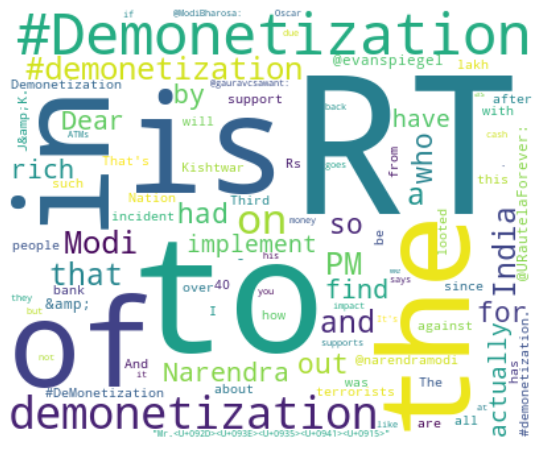

In [4]:
from wordcloud import WordCloud
word_freq = gen_freq(data.text.str)
wc=WordCloud(width=400,height=330,max_words=100,background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize =(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Text Cleaning


In [5]:
import re
def clean_text(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','&',text)
    text=re.sub(r'[?!,;:,#@-]','',text)
    text=re.sub(r"[^a-zA-Z]+", ' ',text)
    
    
    text=text.lower()
    return text

# stop words removal

In [6]:
from wordcloud import STOPWORDS

print(STOPWORDS)

{"she'll", "we've", "she's", 'however', 'like', "what's", "he'll", 'do', 'ever', 'down', 'through', "we'd", 'also', "i'm", 'if', 'only', 'during', 'are', "i'll", "don't", 'most', 'below', "we're", "haven't", 'having', "she'd", "you'll", "isn't", 'a', "we'll", 'above', 'of', 'by', 'they', 'other', 'you', "you'd", 'herself', 'hers', 'himself', 'and', 'off', 'our', 'them', 'she', 'very', 'ours', 'k', "that's", "weren't", 'there', 'her', 'at', 'between', 'or', 'until', "who's", 'yourself', 'was', 'same', 'over', 'those', "won't", 'such', 'does', "he'd", "they'd", 'www', "aren't", 'why', 'before', 'once', 'get', "hasn't", 'how', 'when', 'we', 'more', 'but', 'in', "they've", 'an', 'each', 'on', 'to', 'shall', "where's", 'he', 'own', "why's", 'just', "didn't", 'than', "there's", 'is', 'otherwise', 'ought', 'should', 'these', 'has', 'so', 'this', 'with', "mustn't", 'theirs', 'few', 'could', 'doing', "couldn't", 'as', 'themselves', "i'd", 'him', "here's", 'because', 'not', 'here', 'that', 'afte

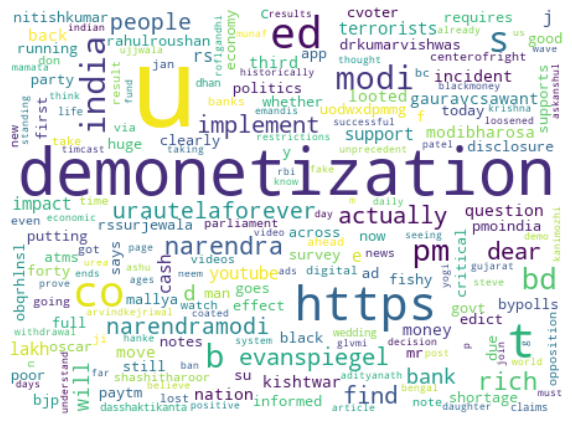

In [7]:
from PIL import Image
from wordcloud import ImageColorGenerator
tweet = np.array(Image.open("tweet.png"))

text=data.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq= word_freq.drop(labels=STOPWORDS ,errors ='ignore')

wc=WordCloud(width=450,height=330,max_words=200,background_color='white',contour_color='firebrick').generate_from_frequencies(word_freq)
#wc.to_file("cloud.png")

image_colors = ImageColorGenerator(tweet)
plt.figure(figsize=(10,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.savefig("tweets.png", format="png")
plt.show()
